In [46]:
import os
import pandas as pd
import json

In [7]:
folder = "final"
dfs = []
for fname in os.listdir(folder):
    if not fname.startswith("val_log"):
        continue
    if not fname.endswith(".csv"):
        continue
    dfs.append(pd.read_csv(os.path.join(folder, fname)))
df = pd.concat(dfs, ignore_index=True)
df

,Unnamed: 0,epoch,train_acc,train_loss,train_val_acc,train_val_loss,test_acc,test_loss,time,version,fname
0,0,0,0.57475,1.456159,0.6028,0.804418,0.5569,0.965002,136.185767,-1,/mnt/d/workspace/clotho/notebooks/checkpoints/...
1,0,1,0.58285,0.751514,0.6110,0.636215,0.5566,0.694464,67.039267,-1,/mnt/d/workspace/clotho/notebooks/checkpoints/...
2,0,2,0.64450,0.596907,0.7041,0.488779,0.6442,0.602905,66.583774,-1,/mnt/d/workspace/clotho/notebooks/checkpoints/...
3,0,3,0.72130,0.480392,0.7418,0.443984,0.6993,0.512000,65.320978,-1,/mnt/d/workspace/clotho/notebooks/checkpoints/...
4,0,4,0.71980,0.477941,0.7364,0.435663,0.6646,0.575909,65.174207,-1,/mnt/d/workspace/clotho/notebooks/checkpoints/...
...,...,...,...,...,...,...,...,...,...,...,...
595,0,115,0.88635,0.238488,0.8684,0.271170,0.6473,0.647169,12.019939,0,/mnt/d/workspace/clotho/notebooks/checkpoints/...
596,0,116,0.88740,0.238663,0.8710,0.266635,0.6412,0.648824,12.005625,0,/mnt/d/workspace/clotho/notebooks/checkpoints/...
597,0,117,0.89130,0.230942,0.8690,0.274455,0.6528,0.631535,11.654421,0,/mnt/d/workspace/clotho/notebooks/checkpoints/...
598,0,118,0.88780,0.236936,0.8730,0.270252,0.6669,0.634986,12.006594,0,/mnt/d/workspace/clotho/notebooks/checkpoints/...


In [36]:
df["name"] = df["version"].map({
    -3: "baseline (single layer difference)",
    -1: "baseline (same embedding)",
    0: "two embeddings (CLS)",
    5: "two embeddings (CLS, noise)",
    7: "two embeddings (mean)",
})
df

,Unnamed: 0,epoch,train_acc,train_loss,train_val_acc,train_val_loss,test_acc,test_loss,time,version,fname,name
0,0,0,0.57475,1.456159,0.6028,0.804418,0.5569,0.965002,136.185767,-1,/mnt/d/workspace/clotho/notebooks/checkpoints/...,baseline (same embedding)
1,0,1,0.58285,0.751514,0.6110,0.636215,0.5566,0.694464,67.039267,-1,/mnt/d/workspace/clotho/notebooks/checkpoints/...,baseline (same embedding)
2,0,2,0.64450,0.596907,0.7041,0.488779,0.6442,0.602905,66.583774,-1,/mnt/d/workspace/clotho/notebooks/checkpoints/...,baseline (same embedding)
3,0,3,0.72130,0.480392,0.7418,0.443984,0.6993,0.512000,65.320978,-1,/mnt/d/workspace/clotho/notebooks/checkpoints/...,baseline (same embedding)
4,0,4,0.71980,0.477941,0.7364,0.435663,0.6646,0.575909,65.174207,-1,/mnt/d/workspace/clotho/notebooks/checkpoints/...,baseline (same embedding)
...,...,...,...,...,...,...,...,...,...,...,...,...
595,0,115,0.88635,0.238488,0.8684,0.271170,0.6473,0.647169,12.019939,0,/mnt/d/workspace/clotho/notebooks/checkpoints/...,two embeddings (CLS)
596,0,116,0.88740,0.238663,0.8710,0.266635,0.6412,0.648824,12.005625,0,/mnt/d/workspace/clotho/notebooks/checkpoints/...,two embeddings (CLS)
597,0,117,0.89130,0.230942,0.8690,0.274455,0.6528,0.631535,11.654421,0,/mnt/d/workspace/clotho/notebooks/checkpoints/...,two embeddings (CLS)
598,0,118,0.88780,0.236936,0.8730,0.270252,0.6669,0.634986,12.006594,0,/mnt/d/workspace/clotho/notebooks/checkpoints/...,two embeddings (CLS)


In [37]:
full_df = df[~df["version"].isin([5])].pivot(
    index="epoch",
    columns="name",
    values=["train_acc", "train_loss", "train_val_acc", "train_val_loss", "test_acc", "test_loss"])
full_df.sort_values("epoch", inplace=True)
full_df

train_acc                                     \
name  baseline (same embedding) baseline (single layer difference)   
epoch                                                                
0                       0.57475                            0.70290   
1                       0.58285                            0.75210   
2                       0.64450                            0.75840   
3                       0.72130                            0.77465   
4                       0.71980                            0.77885   
...                         ...                                ...   
115                     0.53940                            0.84470   
116                     0.54545                            0.85460   
117                     0.54260                            0.85725   
118                     0.53290                            0.84860   
119                     0.54360                            0.86290   

                                                                train_loss  \
name  two embeddings (CLS) two embeddings (mean) baseline (same embedding)   
epoch                                                                        
0                  0.56045               0.55765                  1.456159   
1                  0.58335               0.64955                  0.751514   
2                  0.68290               0.72920                  0.596907   
3                  0.70230               0.72500                  0.480392   
4                  0.70025               0.71790                  0.477941   
...                    ...                   ...                       ...   
115                0.88635               0.88470                  0.688260   
116                0.88740               0.88185                  0.687143   
117                0.89130               0.88360                  0.687941   
118                0.88780               0.88810                  0.689602   
119                0.89045               0.88805                  0.687343   

                                                               \
name  baseline (single layer difference) two embeddings (CLS)   
epoch                                                           
0                               0.509657             3.568299   
1                               0.457293             1.094179   
2                               0.442763             0.692451   
3                               0.426385             0.608012   
4                               0.420006             0.561040   
...                                  ...                  ...   
115                             0.304926             0.238488   
116                             0.293384             0.238663   
117                             0.288374             0.230942   
118                             0.292198             0.236936   
119                             0.273763             0.237505   

                                        train_val_acc  \
name  two embeddings (mean) baseline (same embedding)   
epoch                                                   
0                  1.771445                    0.6028   
1                  0.783948                    0.6110   
2                  0.505554                    0.7041   
3                  0.496448                    0.7418   
4                  0.493816                    0.7364   
...                     ...                       ...   
115                0.242303                    0.6420   
116                0.243606                    0.6391   
117                0.241927                    0.5976   
118                0.236537                    0.6296   
119                0.233352                    0.6348   

                                          ...       train_val_loss  \
name  baseline (single layer difference)  ... two embeddings (CLS)   
epoch                                     ...                        
0                           

<AxesSubplot: xlabel='epoch'>

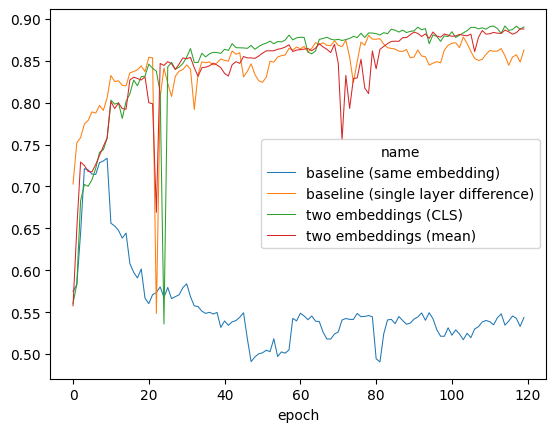

In [74]:
full_df.loc[:, "train_acc"].plot(lw=0.75)

<AxesSubplot: xlabel='epoch'>

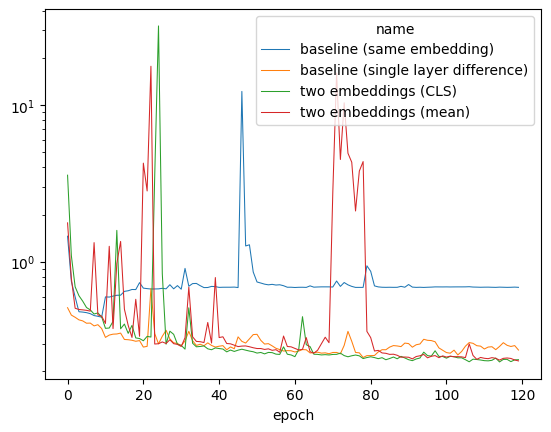

In [73]:
full_df.loc[:, "train_loss"].plot(logy=True, lw=0.75)

<AxesSubplot: xlabel='epoch'>

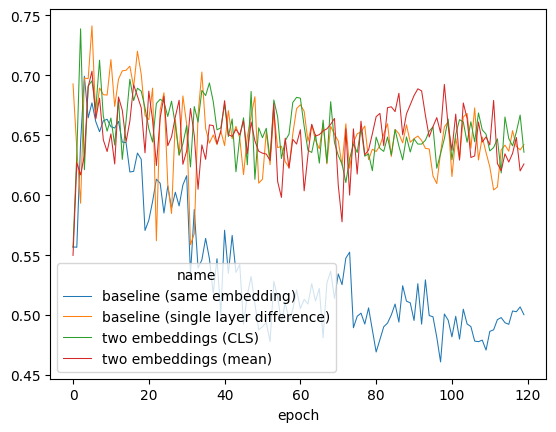

In [71]:
full_df.loc[:, "test_acc"].plot(lw=0.75)

<AxesSubplot: xlabel='epoch'>

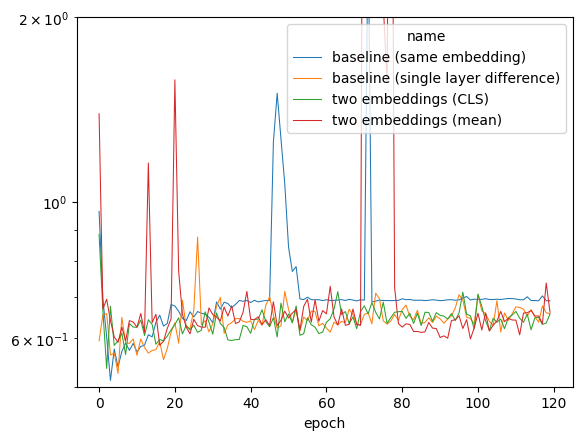

In [72]:
full_df.loc[:, "test_loss"].plot(logy=True, ylim=(0.5, 2), lw=0.75)

<AxesSubplot: xlabel='epoch'>

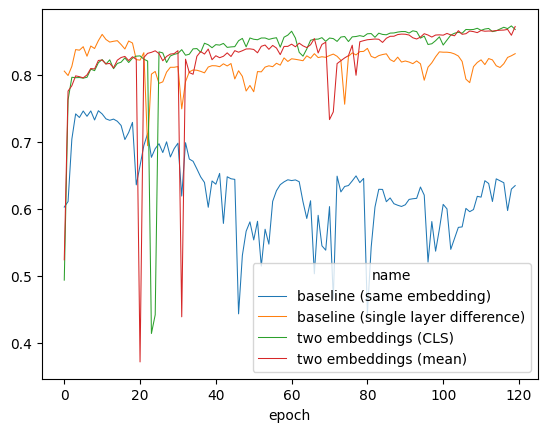

In [69]:
full_df.loc[:, "train_val_acc"].plot(lw=0.75)

<AxesSubplot: xlabel='epoch'>

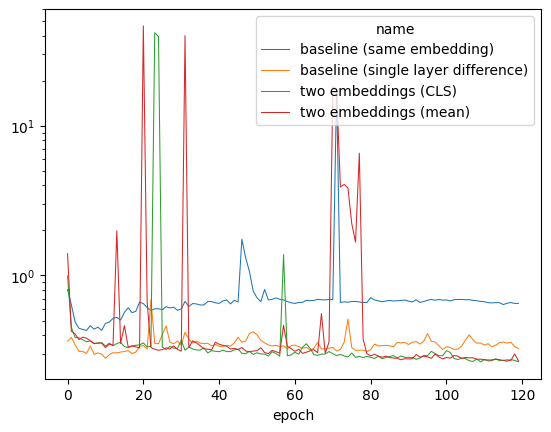

In [68]:
full_df.loc[:, "train_val_loss"].plot(logy=True, lw=0.75)

<AxesSubplot: xlabel='epoch'>

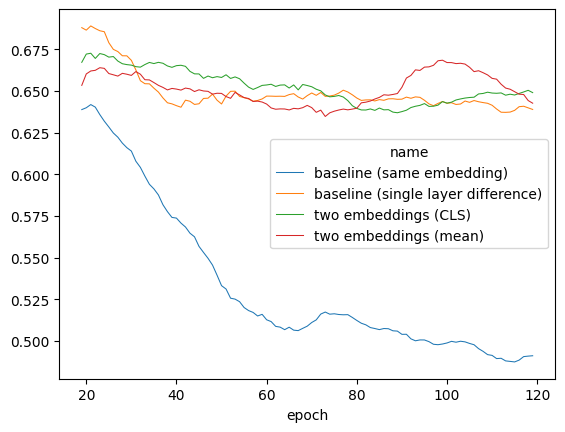

In [67]:
full_df.loc[:, "test_acc"].rolling(20).mean().plot(lw=0.75)

In [75]:
"harness_v0_lg_118"

'harness_v0_lg_118'

In [92]:
val = pd.read_csv("final/validation_v0_lg_.csv", index_col=0).reset_index(drop=True)
val["score_total"] = val["score_left"] + val["score_right"]
val = val.sort_values("score_total", ascending=False)
val

,gen_name,parent_left,child_left,parent_right,child_right,score_left,score_right,correct_is_right,logit_left,logit_right,preds,truth,score_total
4725,*valid_weak--random;(st),What in real life sex doesn’t happen in porn?,When you press your chests together and the trapped air in between makes a fart as it escape,Low fat high sugar food,"Once you stop believing in him, he stops bringing you gifts.",14647,0,False,0.444557,0.555443,1,0,14647
7152,!copy--valid_weak;(st),That's a GTA side quest,[deleted],[deleted],That's a GTA side quest,0,10177,True,0.099865,0.900135,1,1,10177
3266,random--valid_weak;(st),Shit that’s true,"After reheating pizza in a air fryer, I'll never have cold pizza again.",What is the best sitcom ever?,It’s Always Sunny,0,9575,True,0.077242,0.922758,1,1,9575
3244,random--valid_weak;(st),I keep trying to get COVID and unfortunately it friend-zoned me long ago.,That's awesome. I'm going to do this as well.,[TIL it is illegal to run out of fuel on Germany's Autobahn](https://www.schumachercargo.com/autobahn-germany-guide-travel-tips/),[deleted],0,8629,True,0.162878,0.837122,1,1,8629
9975,random--valid_weak;(st),"Tbh... I'm a bit well endowed, my big problem is pants... The seams like to pinch the lil soldier sometimes 😅",But it’s good to note that the reason the video is notable is because it’s *not normal behavior*,I owe the bank 100k,"Hey bud, I think they know...",0,8250,True,0.250629,0.749371,1,1,8250
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,*valid_weak--random;(st),"Just listen to the production of modern beats and how modern rappers use their vocals as another instrument. People who say stuff like ""modern rap sucks"" are usually the types of people who don't know anything about music and just think that everything is about lyrics","Well, this question was supposed to be subjective. So first off, they are allowed to have opinions. Secondly, I agree with them. My reason for this is because allthough lyrics aren't everything to a song, they are what make up the poetry of it. A song could have a good beat, an artist with a nice voice, and even nice sounding instrumentals; but if all the person wants to talk about is money, sex, and drugs, then that is not what I want to have in my ears l day.","We were at a museum in Romania with my 3 year old. They had a planets display from the 60's/70's and he loves planets so we stopped and had a look. Ha asked ""what's that one?"" And things got so awkward so quick. It was like Pluto was the disgraced uncle we don't talk about anymore. We all got so shifty for some reason. Anyway, he's happy he knows about a ""secret"" planet!",Man's an idiot. Ignore him.,1,0,False,0.381578,0.618422,1,0,1
4225,!copy--valid_weak;(st),"Personally I perfered his older stuff like Sundown and Got me thinking, but yeah most his newer stuff I am just out on and I've been riding with him since he was still Mr.Harlow","In terms of current popularity, Jack Harlow. I am a pretty big rap fan, but man that guy makes some of the most mid music I've ever heard. None of it is necessarily bad, but none of it is good either. He just sounds like a white version of when Drake phones it in","In terms of current popularity, Jack Harlow. I am a pretty big rap fan, but man that guy makes some of the most mid music I've ever heard. None of it is necessarily bad, but none of it is good either. He just sounds like a white version of when Drake phones it in","Personally I perfered his older stuff like Sundown and Got me thinking, but yeah most his newer stuff I am just out on and I've been riding with him since he was still Mr.Harlow",0,1,True,0.218180,0.781820,1,1,1
4224,*valid_weak--random;(st),"Not using 1-10, how attractive are you?","In the garden, I would be a potato.",Mobility exercises prevent SO MANY INJURIES.,"Use diatomaceous earth. Roaches gone, fleas gone and it's food grade so no rules broken",1,0,False,0.657995,0.342005,0,0,1
4222,*valid_weak--random;(st),"Conversely, a measure of

In [80]:
pd.set_option('display.max_colwidth', None)

In [93]:
val[val["preds"] != val["truth"]].head(20)

,gen_name,parent_left,child_left,parent_right,child_right,score_left,score_right,correct_is_right,logit_left,logit_right,preds,truth,score_total
4725,*valid_weak--random;(st),What in real life sex doesn’t happen in porn?,When you press your chests together and the trapped air in between makes a fart as it escape,Low fat high sugar food,"Once you stop believing in him, he stops bringing you gifts.",14647,0,False,0.444557,0.555443,1,0,14647
7122,random--valid_weak;(st),I have. What in his words makes you believe his over the words of his accusers? I’m sure it has nothing to do with your political ideology - no sir I wouldn’t imagine that would have anything to do with it.,"When I was in my early twenties yes, I've become very picky over the years realizing that I am just as valuable and needed as we think that of the opposite sex.",Would you be in favor of removing “One Nation under God” from the Pledge of Allegiance and why or why not?,The pledge of allegience itself concerns me far more than the religious bit.,0,5935,True,0.688315,0.311685,0,1,5935
9246,random--valid_weak;(st),Talking about their feelings with their friends,"A decent length that is girthy is better than a 9"" penis. My current dude is 7"" and decent girth and it's perfect.",Dj Khaled,Why did I read this using his voice.,0,5257,True,0.541763,0.458237,0,1,5257
6628,random--valid_weak;(st),For me the bon scott days of acdc we're good But I can't listen to too much of their music too similar,Laser Disk,Guys….what is a big turn off that girls still think is sexy?,Infantilizing themselves.,0,4736,True,0.540422,0.459578,0,1,4736
7337,*valid_weak--random;(st),Men should start reporting female sexual harassment. Edit: thanks for all the love.,"Got slapped on the ass with the words ""haven't seen something so juicy in here for while."" by a female coworker while I was in apprenticeship. Reported it and got the answer:"" you should be glad, it was just a compliment."" Turn this the other way around and the coworker would have got sued and fired. Edit: I know it happens to women way more often and I didn't want to play it down. For this specific company it already happend. A female trainee seemed to have the kind of experience with a male coworker and he actually got called out and at least needed to attend a talk at HR (this isnt enough by any means but something happend).","I've spent the last 13 months focusing on my hair and facial skin, and I feel like I should have picked this up years ago. The amount of compliments I get on my hair and skin is crazy. Girls tell me how my hair is often a topic of discussion between them and friends and how they want to run their fingers through my hair. My hair is almost chin length and is so soft, smooth, straight, and shiny! On the other hand, I'm constantly getting belittled by other men who see me spending the time and effort to take care of my hair and skin. It's sad but an everyday thing. I, however, don't let it bother me because I feel amazing and love the attention I get. Tl;Dr take care of your hair and facial skin! Condition, exfoliate, moisturize, etc!",Lowes home improvement- straight up concrete for 8 hours. No sitting unless you had a MD note.,4216,0,False,0.253317,0.746684,1,0,4216
2711,random--valid_weak;(st),"Went out on a first tinder date. The girl said, ""ew you're ugly, but u look better than your profile""",If you are drunk enough I am not a bad choice,Guys….what is a big turn off that girls still think is sexy?,"This is more of a personal preference on my part TBH: IDFC about the whole ""act indifferent"" routine but then get upset when I go away because of the ""act indifferent"" routine.",0,4039,True,0.731868,0.268132,0,1,4039
4967,*valid_weak--random;(st),Bleached assholes.,"This is called ""changing your ring tone"".","And then, one late night, drinking around the fire, it will come up in a demeaning humiliating way, and it never goes away.","Where does the cycle end? Or has our humanity become so infinit

In [57]:
folder = "final/checkpoints"
all_models = []
for fname in os.listdir(folder):
    if not fname.startswith("stats"):
        continue
    if not fname.endswith(".json"):
        continue
    with open(os.path.join(folder, fname), "r") as fin:
        all_models.append(json.load(fin))
all_models.sort(key=lambda m: (m["version"], m["test_acc"]), reverse=True)
# all_models.sort(key=lambda m: (m["epoch"], m["version"]), reverse=True)
all_models

[{'epoch': 117,
  'fname': '/mnt/d/workspace/clotho/notebooks/checkpoints/harness_v7_lg_117.pkl',
  'test_acc': 0.6482,
  'test_loss': 0.6334270360946656,
  'time': 11.99806495340017,
  'train_acc': 0.8836,
  'train_loss': 0.24192665426587245,
  'train_val_acc': 0.8678,
  'train_val_loss': 0.27026507098992625,
  'version': 7},
 {'epoch': 110,
  'fname': '/mnt/d/workspace/clotho/notebooks/checkpoints/harness_v7_lg_110.pkl',
  'test_acc': 0.642,
  'test_loss': 0.6418178436875344,
  'time': 12.011871437649825,
  'train_acc': 0.88235,
  'train_loss': 0.24250977239514368,
  'train_val_acc': 0.8662,
  'train_val_loss': 0.27384880979245646,
  'version': 7},
 {'epoch': 116,
  'fname': '/mnt/d/workspace/clotho/notebooks/checkpoints/harness_v7_lg_116.pkl',
  'test_acc': 0.6349,
  'test_loss': 0.6518995735645294,
  'time': 12.013179104716013,
  'train_acc': 0.88185,
  'train_loss': 0.2436056237079707,
  'train_val_acc': 0.8668,
  'train_val_loss': 0.27289379537463043,
  'version': 7},
 {'epoch': 